<a href="https://colab.research.google.com/github/MaksimSmolenkov/Prakt_programming/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
import seaborn as sns
import warnings

In [28]:
data= pd.read_csv('DataSet2.csv')
data

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7262b3a8-214d-4205-985c-70e0860f3236
568,568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d64c669b-7a73-496a-bddb-19cb09264371
569,569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647357e9-c067-46bd-aaeb-24d4344ec124


<font size=4>
Датасет содержит следующие поля:

- `Unnamed` — номер в таблице
- `Film` — название фильма
- `Oscar Year` — год получения оскара
- `Film Studio/Producer(s)` — студия. продюссер
- `Award ` — награда
- `Year of Release` — Год выпуска
- `Movie Time` — длительность
- `Movie Genre` — жанр
- `IMDB Rating` — рейтинг на IMDB
- `IMDB Votes` — количество голосов на IMDB
- `Movie Info` — информация о фильме
- `Genres` — жанры
- `Critic Consensus` — вывод критиков
- `Content Rating` — оценка содержания
- `Directors` — режиссеры
- `Authors` — сценаристы
- `Actors` — актёры
- `Original Release Date` — оригинальная дата выхода
- `Streaming Release Date` — дата выхода на стриминговых сервисах
- `Production Company` — производственная кампания
- `Tomatometer Status` — статус томатометра
- `Tomatometer Rating` — рейтинг томатометра
- `Tomatometer Count` — счетчик томатометра
- `Audience Status` — статус аудитории
- `Audience Rating` — рейтинг аудитории
- `Audience Count` — счетчик аудитории
- `Tomatometer Top Critics Count` — количество хороших оценок томатометра
- `Tomatometer Fresh Critics Count` — рейтинг аудитории
- `Tomatometer Rotten Critics Count` — плохии оценки томатометра
- `Film ID ` — идентефикатор фильма

</font>

In [29]:
data = data.drop(['Unnamed: 0'], axis=1)

In [30]:
data.rename(columns = {'Movie Info':' movie_info'}, inplace = True )


In [31]:
data.head(5)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,movie_info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [32]:
data.tail(5)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,movie_info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7262b3a8-214d-4205-985c-70e0860f3236
568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d64c669b-7a73-496a-bddb-19cb09264371
569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647357e9-c067-46bd-aaeb-24d4344ec124
570,The Trial of the Chicago 7,2020,Marc Platt and Stuart M. Besser,Nominee,2020,129,"Drama,History,Thriller",7.8,"156,283",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cecbca48-f19c-43f4-81d2-da130facda95


In [33]:
data.describe()

,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              571 non-null    object 
 1   Oscar Year                        571 non-null    object 
 2   Film Studio/Producer(s)           571 non-null    object 
 3   Award                             571 non-null    object 
 4   Year of Release                   571 non-null    int64  
 5   Movie Time                        571 non-null    int64  
 6   Movie Genre                       571 non-null    object 
 7   IMDB Rating                       571 non-null    float64
 8   IMDB Votes                        571 non-null    object 
 9    movie_info                       438 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  339 non-null    object 
 12  Content 

#5

<ipython-input-35-7e09e819fb28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(data['IMDB Rating'])           #cпросить


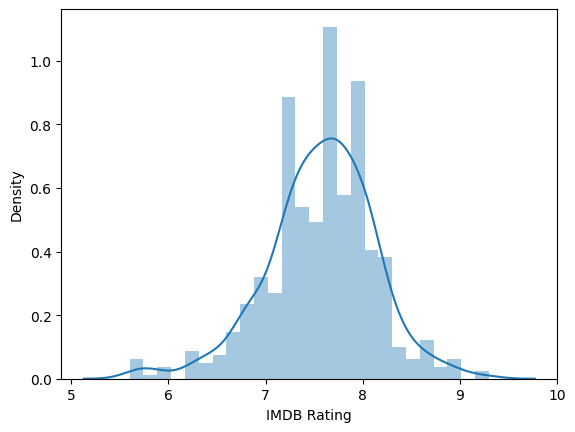

In [35]:
hist = sns.distplot(data['IMDB Rating'])           #cпросить
plt.savefig('hist.png')

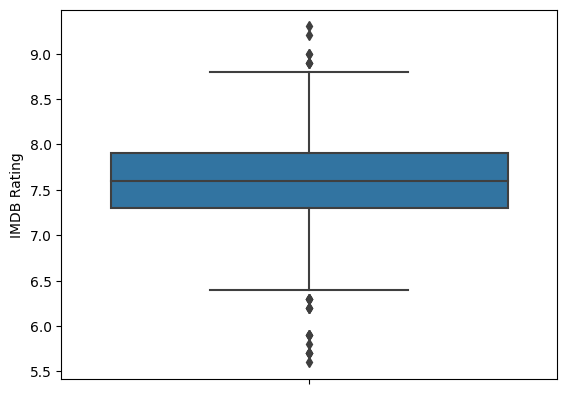

In [36]:
sns.boxplot(y = 'IMDB Rating', data = data)
plt.savefig("boxplot.png")

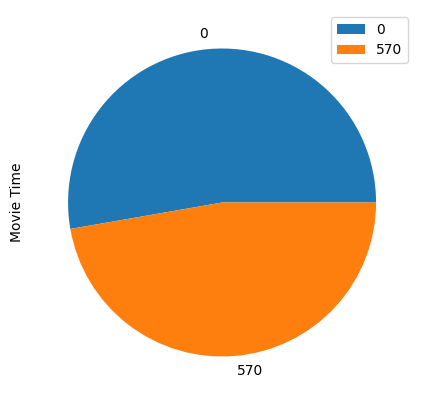

In [37]:
data1 = data.iloc[[0, -1]]
plot = data1.plot.pie(y='Movie Time', figsize=(5, 5))
plt.savefig("round.png")

<ipython-input-38-7fec54c75ace>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


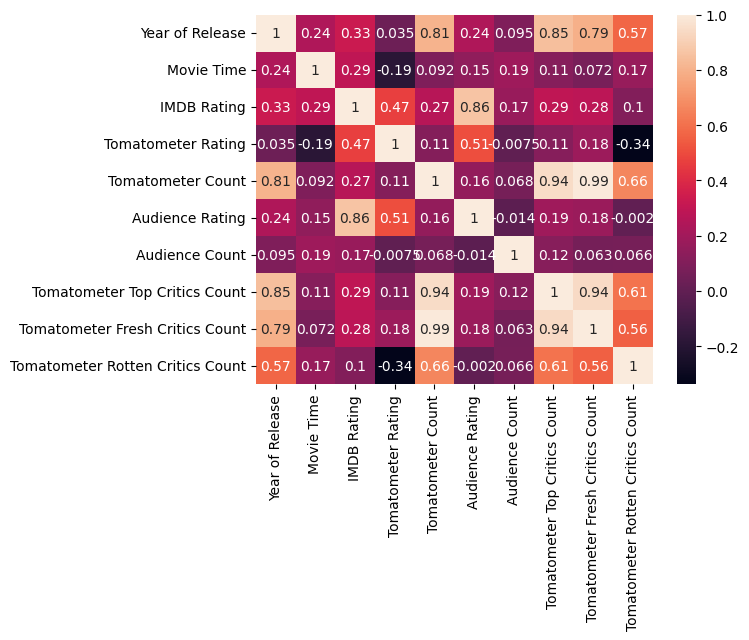

In [38]:
sns.heatmap(data.corr(), annot = True)
plt.savefig("heatmap.png")

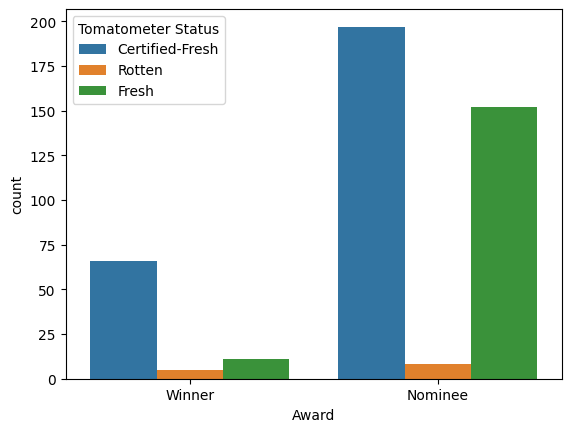

In [39]:
sns.countplot(data, x = "Award", hue = "Tomatometer Status")
plt.savefig("countplot.png")

#6

In [40]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Streaming Release Date              23.292469
 movie_info                         23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Tomatometer Status                  23.117338
Genres                              23.117338
Tomatometer Top Critics Count       23.117338
Content Rating                      23.117338
Tomatometer Fresh Critics Count     23.117338
Tomatometer Rating                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rotten Critics Count    23.117338
Production Company                  23.117338
Film                                 0.000000
Oscar Year                           0.000000
IMDB Votes                        

In [41]:
data.describe()

,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


In [45]:
data['Critic Consensus'].fillna("uknown",inplace = True)
data['Audience Status'].fillna("uknown",inplace = True)
data['Authors'].fillna("uknown",inplace = True)
data['Directors'].fillna("uknown",inplace = True)
data['Streaming Release Date'].fillna("0000-00-00",inplace = True)
data['Audience Rating'].fillna(82.42,inplace = True)
data['Audience Count'].fillna(515414.,inplace = True)
data['Tomatometer Count'].fillna(110.697039,inplace = True)
data['Production Company'].fillna("uknown",inplace = True)
data['Tomatometer Top Critics Count'].fillna(21.86,inplace = True)
data['Genres'].fillna("uknown",inplace = True)
data['Tomatometer Fresh Critics Count'].fillna(98.47,inplace = True)
data['Content Rating'].fillna("uknown",inplace = True)
data['Tomatometer Rotten Critics Count'].fillna(12.28,inplace = True)
data['Tomatometer Status'].fillna("uknown",inplace = True)
data['Actors'].fillna("uknown",inplace = True)
data['Original Release Date'].fillna("0000-00-00",inplace = True)
data['Tomatometer Rating'].fillna(87.5,inplace = True)


data.duplicated().sum()

0

In [46]:
data.isna().sum()

Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
 movie_info                         133
Genres                                0
Critic Consensus                      0
Content Rating                        0
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                    0
Tomatometer Count                     0
Audience Status                       0
Audience Rating                       0
Audience Count                        0


# 7

In [47]:
Movie_sample = data['Movie Time'].head(200) #первые 200 строк столбца время фильма

In [48]:
Movie_sample = Movie_sample.to_numpy()

In [49]:
print(normaltest(Movie_sample))

NormaltestResult(statistic=78.50786717434167, pvalue=8.958457755971898e-18)


P-value очень маленькое, значит выборка близка к нормальной

# 8

In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [51]:
Tomate_ENC = pd.get_dummies(data['Tomatometer Status'])
Audience_ENC = pd.get_dummies(data['Audience Status'])
print(Tomate_ENC)
print(Audience_ENC)

     Certified-Fresh  Fresh  Rotten  uknown
0                  1      0       0       0
1                  0      0       0       1
2                  0      0       0       1
3                  0      0       1       0
4                  0      0       0       1
..               ...    ...     ...     ...
566                0      0       0       1
567                0      0       0       1
568                0      0       0       1
569                0      0       0       1
570                0      0       0       1

[571 rows x 4 columns]
     Spilled  Upright  uknown
0          0        1       0
1          0        0       1
2          0        0       1
3          1        0       0
4          0        0       1
..       ...      ...     ...
566        0        0       1
567        0        0       1
568        0        0       1
569        0        0       1
570        0        0       1

[571 rows x 3 columns]


# 9

In [52]:
df = pd.DataFrame(data)
df.to_csv('Prakt6')